# Should we use fixed effect or random effect to control repeated measurement?
- If the repeated measurements are completely nested within the explanatory variable (group, in this example), we **should not** use fixed effect.
- If not, we can use fixed effect.
- But, usually we use random effect because we are not interested in the differences in inter-individual differences (see examples below)

In [118]:
#library
library(magrittr)
library(ggsci)
library(ggplot2)
library(lme4)
library(lmerTest)

## The repeated measurements are completely nested within the explanatory variable (group)

### Generate data
- 100 individuals from each of two groups (G1, G2): nested
- 4 measurement/individual
- Our expectation: higher expression of gene X in G2 than G1
- Covariate: gender (individual specific), batch (individual non-specific)

In [123]:
df <- data.frame()

#group 1: mean=5
for(i in 1:50){
    ID=paste0("Ind",i)
    delta=rnorm(1) #individual specific error term
    Exp=rnorm(n=4, mean = 5 + delta )
    Gender=sample(x=c(1,0),size=1, replace = T,prob=c(0.5,0.5))
    Batch=sample(x=c(1,0),size=4, replace = T,prob=c(0.5,0.5))
    dump <- data.frame(ID,Exp,Gender,Batch,Group="G1")
    df <- rbind(df,dump)
}

#group 2: mean=7
for(i in 51:100){
    ID=paste0("Ind",i)
    delta=rnorm(1) #individual specific error term
    Exp=rnorm(n=4, mean = 7 + delta )
    Gender=sample(x=c(1,0),size=1, replace = T,prob=c(0.5,0.5))
    Batch=sample(x=c(1,0),size=4, replace = T,prob=c(0.5,0.5))
    dump <- data.frame(ID,Exp,Gender,Batch,Group="G2")
    df <- rbind(df,dump)
}

In [124]:
head(df,n=10)

ID,Exp,Gender,Batch,Group
Ind1,4.234708,0,0,G1
Ind1,3.819038,0,0,G1
Ind1,5.475554,0,1,G1
Ind1,4.421530,0,1,G1
Ind2,5.037332,1,0,G1
Ind2,5.111686,1,0,G1
Ind2,3.793720,1,1,G1
Ind2,6.792708,1,1,G1
Ind3,5.998817,1,1,G1
Ind3,5.209151,1,0,G1


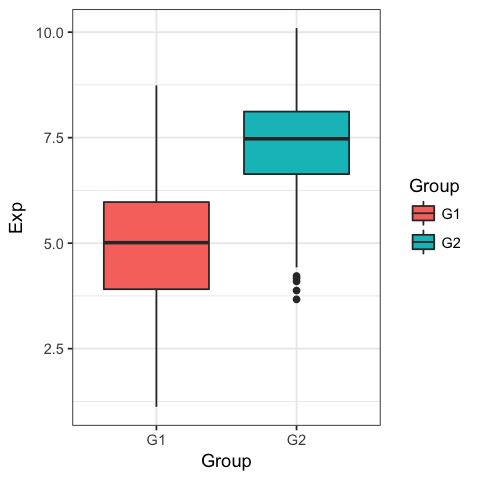

In [125]:
#visualize
options(repr.plot.width=4, repr.plot.height=4)
df %>% ggplot(aes(x=Group,y=Exp,fill=Group)) +
    geom_boxplot() +
    theme_bw()

### LM with a fixed effect individual term

In [126]:
mod1 <- lm(Exp ~ Group + ID,data=df)
summary(mod1)$coefficients %>% head()
#the significance of Group term was canceled completely.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.4877075,0.5082245,8.8301679,8.905893e-17
GroupG2,0.5265709,0.7187380,0.7326326,4.643546e-01
IDInd2,0.6961540,0.7187380,0.9685783,3.335359e-01
IDInd3,0.5414629,0.7187380,0.7533523,4.518291e-01
IDInd4,0.4762650,0.7187380,0.6626407,5.080694e-01
IDInd5,-0.5756149,0.7187380,-0.8008690,4.238413e-01


### LMM with a random effect individual term

In [128]:
mod1 <- lmer(Exp ~ Group  + (1|ID),data=df)
summary(mod1)$coefficients
#the significance of Group term was maintained.

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),4.970086,0.1473087,97.99999,33.73925,9.509367e-56
GroupG2,2.338073,0.2083260,97.99999,11.22315,2.745949e-19


## The repeated measurements are not nested within the explanatory variable (group)

### Generate data
- 100 individuals 
- 4 measurement/individual (2 from G1, 2 from G2)
- Our expectation: higher expression of gene X in G2 than G1
- Covariate: gender (individual specific), batch (individual non-specific)

In [129]:
df <- data.frame()

for(i in 1:100){
    ID=paste0("Ind",i)
    delta=rnorm(1) #individual specific error term
    Exp1=rnorm(n=2, mean = 5 + delta ) #G1
    Exp2=rnorm(n=2, mean = 7 + delta ) #G2
    Exp=c(Exp1,Exp2)
    Gender=sample(x=c(1,0),size=1, replace = T,prob=c(0.5,0.5))
    Batch=sample(x=c(1,0),size=4, replace = T,prob=c(0.5,0.5))
    dump <- data.frame(ID,Exp,Gender,Batch,Group=c("G1","G1","G2","G2"))
    df <- rbind(df,dump)
}


In [130]:
head(df,n=10)

ID,Exp,Gender,Batch,Group
Ind1,6.588780,1,0,G1
Ind1,7.080130,1,0,G1
Ind1,10.021329,1,1,G2
Ind1,8.067453,1,1,G2
Ind2,5.015754,1,1,G1
Ind2,3.659383,1,1,G1
Ind2,7.195401,1,1,G2
Ind2,7.290204,1,0,G2
Ind3,3.739283,0,1,G1
Ind3,5.667174,0,1,G1


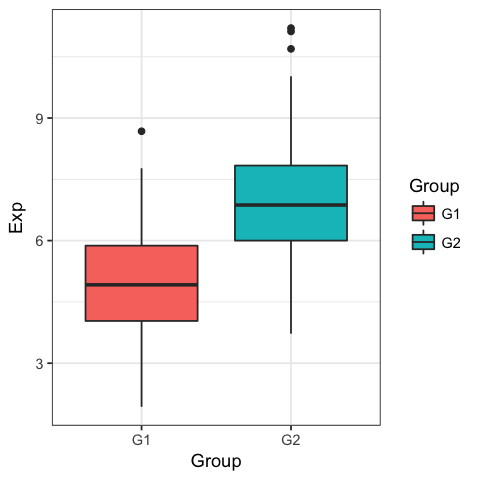

In [131]:
#visualize
options(repr.plot.width=4, repr.plot.height=4)
df %>% ggplot(aes(x=Group,y=Exp,fill=Group)) +
    geom_boxplot() +
    theme_bw()

### LM with a fixed effect individual term

In [132]:
mod1 <- lm(Exp ~ Group  + ID,data=df)
summary(mod1)$coefficients %>% head()
#the significance of Group term was mainteined.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.944848,0.45532894,15.252375,2.985366e-39
GroupG2,1.989151,0.09061385,21.951957,2.744501e-64
IDInd2,-2.149238,0.64073664,-3.354323,8.981611e-04
IDInd3,-2.602455,0.64073664,-4.061661,6.230222e-05
IDInd4,-3.152104,0.64073664,-4.919501,1.434954e-06
IDInd5,-3.048254,0.64073664,-4.757421,3.055917e-06


### LMM with a random effect individual term

In [133]:
mod1 <- lmer(Exp ~ Group  + (1|ID),data=df)
summary(mod1)$coefficients
#the significance of Group term was mainteined.

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),4.928637,0.11957849,133.7262,41.21675,6.945236e-78
GroupG2,1.989151,0.09061385,299.0000,21.95196,2.744502e-64
